In [33]:
# ==========================
# Demand Forecasting (Holt-Winters)
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [34]:
# Step 1: Load Data
df = pd.read_csv(r"C:\Users\Vaishali Magar\Cleaned_Classes_April_June_2018.csv")

In [35]:
#step 2
df['Date'] = pd.to_datetime(df['BookingEndDateTime'], errors='coerce')


In [36]:
# Step 3: Aggregate Daily Demand
daily_data = df.groupby(df["Date"].dt.date)["Number_Booked"].sum()

In [37]:
# Step 4: Train-Test Split (80-20)
train_size = int(len(daily_data) * 0.8)
train, test = daily_data.iloc[:train_size], daily_data.iloc[train_size:]

print("Train size:", len(train), " Test size:", len(test))


Train size: 72  Test size: 19


In [38]:
# Convert index to datetime and set daily frequency
daily_data.index = pd.to_datetime(daily_data.index)
daily_data = daily_data.asfreq("D").fillna(0)
print("Daily demand sample:")
print(daily_data.head(10))
print("Shape:", daily_data.shape)

Daily demand sample:
Date
2018-04-01     5.483962
2018-04-02    -1.220507
2018-04-03    21.468200
2018-04-04    -0.074230
2018-04-05    -2.391837
2018-04-06   -11.432598
2018-04-07     6.328296
2018-04-08     4.700612
2018-04-09     1.455099
2018-04-10    18.837356
Freq: D, Name: Number_Booked, dtype: float64
Shape: (91,)


In [39]:
# Step 4: Train/Test Split
train_size = int(len(daily_data) * 0.8)
train, test = daily_data.iloc[:train_size], daily_data.iloc[train_size:]
print("Train size:", len(train))
print("Test size:", len(test))

Train size: 72
Test size: 19


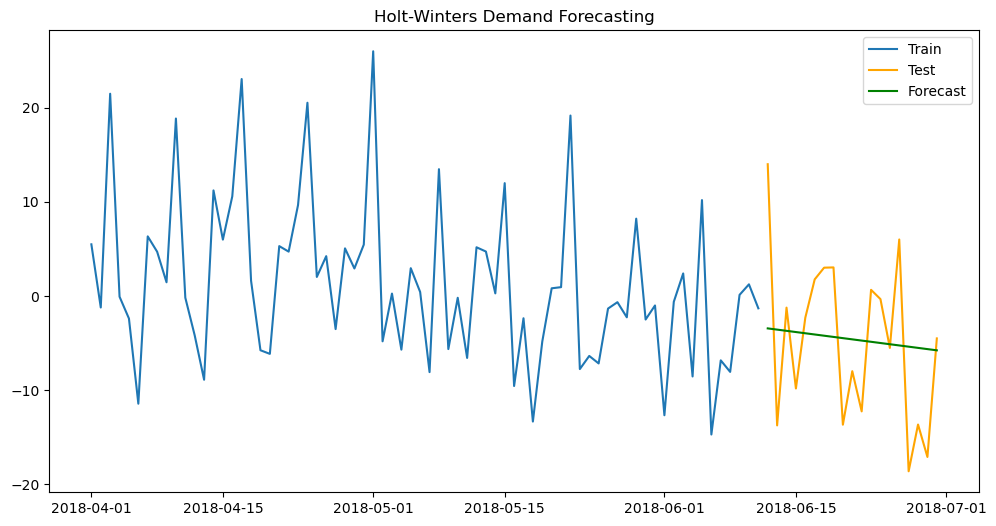

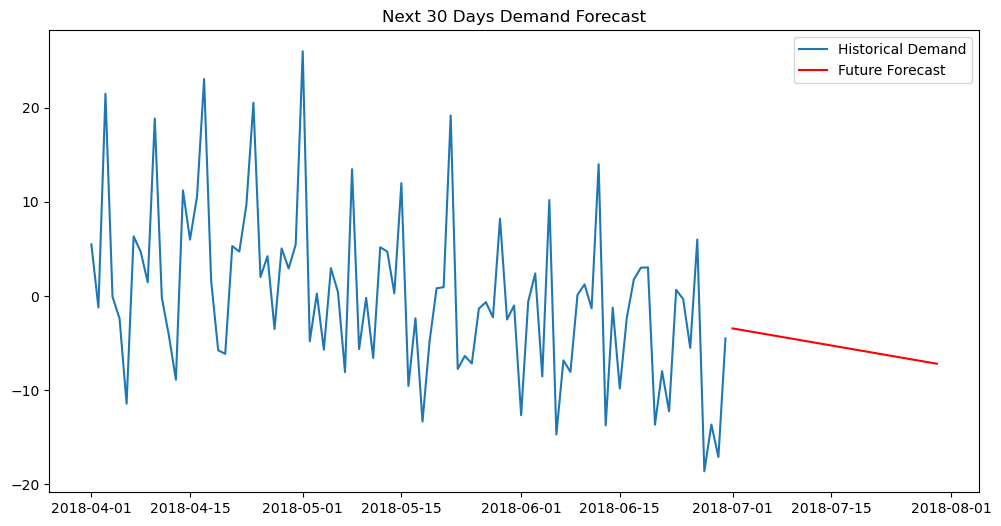

In [41]:
# Step 5: Holt-Winters Forecasting
if len(train) > 0:
    model = ExponentialSmoothing(train, trend="add", seasonal=None)
    model_fit = model.fit()

    # Forecast on Test Set
    forecast = model_fit.forecast(len(test))

    # Plot Train/Test/Forecast
    plt.figure(figsize=(12,6))
    plt.plot(train.index, train, label="Train")
    plt.plot(test.index, test, label="Test", color="orange")
    plt.plot(test.index, forecast, label="Forecast", color="green")
    plt.legend()
    plt.title("Holt-Winters Demand Forecasting")
    plt.show()

    # Forecast Future (Next 30 Days)
    future_forecast = model_fit.forecast(30)

    plt.figure(figsize=(12,6))
    plt.plot(daily_data.index, daily_data, label="Historical Demand")
    plt.plot(pd.date_range(daily_data.index[-1] + pd.Timedelta(days=1), periods=30, freq="D"),
             future_forecast, label="Future Forecast", color="red")
    plt.legend()
    plt.title("Next 30 Days Demand Forecast")
    plt.show()
else:
    print("⚠️ Train set is empty. Check if date parsing worked correctly.")

In [42]:

# Calculate MAE and MSE
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)



Mean Absolute Error (MAE): 7.05857412013282
Mean Squared Error (MSE): 68.28244515241063
